In [1]:
# Data Visualizations with R
# 
# Author: PatriciaHoffman
###############################################################################
#http://www.slideshare.net/dataspora/a-survey-of-r-graphics#btnNext

rm(list=ls())
require(graphics)
#install.packages("rgl") # function plot3d
library(rgl)
#install.packages("scatterplot3d")
library(scatterplot3d)
#install.packages("grid")
library("grid")

colours() #  List out colors that are available with R

library(help="graphics")
#This will show you several graphics functions
#press the Enter key to mmove to each new graph
#demo(graphics)
#demo(rgl)
demo(scatterplot3d)
############################################

#            Working with Graphs
#                Create synthetic data
#                from Gaussian and Poisson Distributions

#############################################

#more graphs can be found at
#http://rgm2.lab.nig.ac.jp/RGM2/images.php?show=all&pageID=1396

?plot                        #list of available plot functions
methods("plot")              #list of available plot methods
?plot.lm                     #


x <- seq(1,20,0.5)
y <- 1 + 2*x + rnorm(39)

model <- lm(y~x)
plot(x,y)
abline(model$coef)
#abline(intercept,slope)
abline(h=20,col = 3) #horizontal line at y = 20 color green
abline(v=10,col = 2) #vertical line at x = 10 color red

# Lots of plots when the following is executed
# the plot for the lm model just constructed
plot(model,which = c(1:6) )  


###################################################
###            Plot parameters Examined
###################################################

# Plot of three distributions

# multiple plots per graph
oldpar <- par(no.readonly=TRUE) # record current setting
                                # no.readonly means to only save the things that can be changed
# oldpar$mar = default of mar is c(5, 4, 4, 2) + 0.1. 
#  par(mar=c(5, 4, 4, 2) + 0.1)
par(mar=rep(1, 4)) # make the margins smaller for RStudio
par(mfrow=c(3,1))  # put three graphs on same page

# Various Distributions
#Normal   mean = 4, sd = 2
curve(dnorm(x, mean=4,sd=2),from=-2,to=10,
		main = "Normal: mean = 4; variance = 4")

x <- seq(0, 15, 1)
#Poisson
plot(x, dpois(x, 4), type = "s", ylab = "dpois(lambda = 4)", xlim=c(-2,10),main = "Poisson: mean = variance = 4")

#Binomial
plot(x, dbinom(x, 8, 0.5), type = "s", ylab = "dbinom(n=8, p=0.5)",xlim=c(-2,10),
		main = "Binomial: mean = 4, variance = 2")


#  Poisson Chart with varing lambda
poisdist <- function(x, lambda){
	return(lambda^x*exp(-lambda)/factorial(x))
}
par(mfrow=c(3,1))
curve(poisdist(x, 1),from=0,to=8, ylim=c(0, 0.4),
       main = "Poisson Density Function")
curve(poisdist(x, 2),from=0,to=8, ylim=c(0, 0.4))

curve(poisdist(x, 1),from=0,to=8, ylim=c(0, 0.4),ylab = "")
par(new=TRUE)
curve(poisdist(x, 2),from=0,to=8,ylim=c(0, 0.4),ylab = "")
par(new=TRUE)
curve(poisdist(x, 3),from=0,to=8, ylim=c(0, 0.4), col="red",
		ylab = "poisdist(x, 3) in red: poisdist(x, 4) in blue",new=FALSE)
par(new=TRUE)
curve(poisdist(x, 4),from=0,to=8,
		ylim=c(0, 0.4), col="blue",
		ylab = "poisdist(x, 3) in red: poisdist(x, 4) in blue",new=FALSE)
par(new=FALSE)


par(oldpar) # restore settings

#Set up data for histograms
# set up data for plotting

x <- seq(1,20,1)
y <- rnorm(20, mean = 1)# 20 random point from normal mean = 1 sd = 1
z <- rpois(20, 1)# 20 random point from poisson lambda = mean = 1 sd = 1


#?par     shows definitions of parameters
#   keep scrolling down as many variables are defined
# plotting parameters
#pch is character used for plotting;  pch = 19 is a closed circle
#   filled pch 15,16,17,18,open are pch = 0,1,2,3,4
#lwd is line width
#cex character (or symbol) expansion; cex = 1.2 make dots 20% larger
#ylim and xlim are the limits on the shown axis
#xlab="...";ylab="..."  labels for the x and y axis
#col is color  col = "blue" col.axis, col.lab, col.main, 
#lty is the line type solid, dashed, etc look at lty=1; through lty=6; 
#type is the way lines are plotted
#type = p gives dots, type=l gives the line, type=0 line with dots, type=b line with breaks and dots
# type = c, s, $, h
#par(lty=2,pch=19,col="blue") all this will be in effect for all the graphs that follow 
#par() will tell you what you set
plot(x, y, type="b",  
		pch=15, lty=1, col="red", ylim=c(min(y), max(max(z), max(y))),
		lwd=2, cex=1.5, font.lab=2,
		main="Gaussian compared with Poisson", 
		xlab="Value of x", ylab="Gaussian and Poisson: mean and sd = 1 ") 
lines(x, z, type="b", 
		pch=17, lty=2, col="blue", cex=1.5) 
abline(h=c(1), lwd=1.5, lty=2, col="grey") 
legend("topleft", inset=.05, title="Gaussian vs. Poisson", c("Gaussian","Poisson"), 
		lty=c(1, 2), pch=c(15, 17), col=c("red", "blue"))

set.seed(pi)

#  Gaussian Distribution

# generate 1000 data points from a Normal Distribution
#              with variance = mean = 3
#  f(x) = 1/(sqrt(2*pi*sd) e^-((x - mean)^2/(2 sd^2)) 
#   sd = the standard deviation. 
normalData <- rnorm(1000, mean = 3, sd = sqrt(3))
normalData[1:10]

#  Poisson Distribution

# generate 1000 data points from a Poisson Distribution 
#              with lambda = variance = mean = 3
#  p(x) = lambda^x exp(-lambda)/x!   The mean and variance are E(X) = Var(X) = lambda. 
poissonData <- rpois(1000, 3)
#Remember Poisson data are integers
poissonData[1:10]
max(poissonData)
sprintf("%1.10f",poissonData[which(poissonData == max(poissonData))])

min(poissonData)
var(poissonData)
mean(poissonData)

# 

#  Binomial Distribution

#rbinom(n= number of observations, size = number of trials, prob= prob of success on each trial)
#     p(x) = choose(n,x) p^x (1-p)^(n-x)
#     mean = np, variance = np(1-p)
binomData <- rbinom(1000,size = 9, prob = 1/3)# mean = 3, variance = 2
plot(binomData)
mean(binomData)
var(binomData)

#head(binomData)
#3 4 3 1 1 2
#The experiment is run 1000 times, so there are 1000 answers
# There is a bag with three colors of marbles, red, green, and blue.
# each color occurs with equal frequency
# 
#  The trial consists of picking 8 marbles (with replacement) 
#     from the bag.  A success is picking a red marble.
#     In the first trial 3 red marbles were picked.
#     In the second trial 4 red marbles were picked.
#
#  binomData records the number of successes in each trial
#



###################################################
###            Box Plot
###################################################

# for the box plot
#     the dots at top and bottom are outliers
#     the top and bottom lines represent the 10% and 90% levels
#     the top and bottom of the box are the 25% and the 75%
#     the middle line is the 50% marker

boxplot(normalData,poissonData,col=c("blue",'red'),
	main="Comparison of Normal and Poisson Distributions",
	names=c("Normal Distribution","Poisson Distribution"),ylab="Values")
#rug(jitter(normalData), side = 2)


# Pause between graphs - requires a click
#   to see the next graph
# 
par(ask=TRUE)

# add some outliers
normalOut <- c(normalData,8.5,8.6,8.7,8.8)
poissonOut <- c(poissonData,8.5,8.6,8.7,8.8)
boxplot(normalOut,poissonOut,col=c("blue",'red'),
		main="Comparison of Normal and Poisson Distributions",
		names=c("Normal Distribution","Poisson Distribution"),ylab="Values")

# add points on top of each other
normalOut <- c(normalOut,9.5, 9.5, 9.5, 9.5, 9.5)
poissonOut <- c(poissonOut,9.5, 9.5, 9.5, 9.5, 9.5)
boxplot(normalOut,poissonOut,col=c("blue",'red'),
		main="Comparison of Normal and Poisson Distributions",
		names=c("Normal Distribution","Poisson Distribution"),ylab="Values",
        rug(normalOut))


###################################################
###             Histogram
###################################################
hist(normalData, freq=TRUE, breaks=seq(from=-7,to=12,by=.5), 
		main="Normal Distribution")
hist(poissonData, freq=TRUE, breaks=seq(from=0,to=12,by= 1), 
		main="Poisson Distribution")
hist(binomData,freq=TRUE,breaks = seq(from= min(binomData),to=max(binomData),by= 1),
		main="Binomial Distribution")

# multiple plots per graph
oldpar <- par(no.readonly=TRUE) # record current setting
par(mfrow=c(3,1)) 
minD = min(normalData,poissonData,binomData) - 0.001
maxD = max(normalData,poissonData,binomData) + 0.001
hist(normalData, freq=TRUE, breaks=seq(from=-7,to=12, by=1), 
		main="Normal Distribution",xlim=c(minD, maxD))
hist(poissonData, freq=TRUE, breaks=seq(from=0, to=maxD, by=1), 
		main="Poisson Distribution",xlim=c(minD, maxD))
hist(binomData,freq=TRUE,breaks = seq(from=min(binomData), to=max(binomData), by=1),
		main="Binomial Distribution",xlim=c(minD, maxD))
par(oldpar) # restore settings


###################################################
###         Empirical Cumulative Distribution Function 
###################################################

# ecdf plot of Gaussian Data
plot(ecdf(normalData), col='red',
		main="Gaussian Distribution Empirical Cumulative Distribution",
#		xlab="x",
#		ylab="Cumulative Percent of Values less than x"
)
par(ask=TRUE)
# ecdf plot of Poisson Data
plot(ecdf(poissonData), pch='+', col='red',
		main="Poisson Distribution Empirical Cumulative Distribution",
#		xlab="x",
#		ylab="Cumulative Percent of Values less than x"
)

plot(ecdf(poissonData), pch='+', col='red',
		main="Comparison of Normal and Poisson Distributions",
#		xlab="x",
#		ylab="Cumulative Percent of Values less than x"
)
lines(ecdf(normalData), pch='.', col='blue')
legend(2500, .5, c("normal","poisson"), cex=1, 
		col=c("blue","red"), pch=c('.','+'), lty=1:2)


# another way to have two functions plotted on same axis
#  use the add=True option on the plot function 
graphone <- ecdf(poissonData)
graphtwo <- ecdf(normalData)
plot(graphone, col = "red", main="ECDF - Home prices", xlab="Price in thousands", ylab="ECDF")
plot(graphtwo, col = "green", add=TRUE)
legend(2500, .5, c("normal","poisson"), cex=1, 
		col=c("blue","red"), pch=c('.','+'), lty=1:2)

###################################################
###         Gaussian Distribution Plots on same page 
###################################################

par(mfrow=c(2,2))
boxplot(normalData,col="blue",
		main="Normal Distribution Box Plot",
		names="Normal Distribution",ylab="Values")
hist(normalData, freq=TRUE, breaks=seq(from=-7,to=12,by=.5), 
		main="Normal Distribution Histogram")
curve(dnorm(x, mean=3,sd=3),from=-7,to=12,
		main = "Normal Density Function")
plot(ecdf(normalData), col='red',
		main="Empirical Cumulative Distribution",
#		xlab="x",
#		ylab="Cumulative Percent of Values less than x"
)

par(oldpar) # restore settings


plot(density(normalData),col="blue",
		main="Use density to plot of normalData as curve")
#plot(normalData,type = 'l',
#		main="Use type = 'letter L' to plot of normalData as curve")

###################################################
###         Scatter Plot 
###################################################

normalDatasd20 <- rnorm(1000, mean = 3, sd = sqrt(20))
normalData[1:10]

plot(normalData, normalDatasd20, pch=20, col='blue', 
		main="Comparison of Normal Distributions with different variances",
		xlim=c(-10,20),ylim=c(-10,20),
		xlab="Variance = 3",
		ylab="Variance = 20"
)

#Scatter Plot with meaningful colors
#mtext(text, side = 3, line = 0, outer = FALSE, at = NA,
#		adj = NA, padj = NA, cex = NA, col = NA, font = NA, ...)
spl<-mean(iris$Petal.Length[1:50])
verpl<-mean(iris$Petal.Length[51:101])
virpl<-mean(iris$Petal.Length[101:150])
spw<-mean(iris$Petal.Width[1:50])
verpw<-mean(iris$Petal.Width[51:101])
virpw<-mean(iris$Petal.Width[101:150])

par(mfrow=c(1,1)) 
#Plot the Iris Data using a different color for each Species

plot(iris$Petal.Length,iris$Petal.Width, xlab="Petal Length",
      ylab="Petal Width", pch=20, main="Iris Petal Length VS Petal Width"
      ,col=iris$Species)
mtext("mean Petal Length: Setosa = 1.4,Versicolor = 4.3,Virginica = 5.5", side = 3, line = 0)
points(spl,spw,pch= 2,col = 1)
points(verpl,verpw,pch= 2,col = 2)
points(virpl,virpw,pch= 2,col = 3)      
legend("bottomright",legend=levels(factor(iris$Species)),
        text.col=seq_along(levels(iris$Species))
       )


boxplot(iris[1:50,3],iris[51:100,3],iris[101:150,3],col=c("blue",'red','green'),
		main="Box Plot of Petal Lengths",
		names=c("Setosa","Versicolor","Virginica"),ylab="Values")
rug(jitter(iris[1:50,3]), side = 2)
rug(jitter(iris[101:150,3]), side = 4)

pairs(iris[1:4], main="Edgar Anderson's Iris Data", pch=21,
	bg = c("blue",'red','green')[unclass(iris$Species)])
# Look at correlations
symnum(cor(iris[,1:4]))

#            S.L S.W P.L P.W
#Sepal.Length 1              
#Sepal.Width      1          
#Petal.Length +   .   1      
#Petal.Width  +   .   B   1  
#"legend"
#0 ' ' 0.3 '.' 0.6 ',' 0.8 '+' 0.9 '*' 0.95 'B' 1


par(mfrow=c(1,1))   # put 2 charts on a page
petlng <- c(mean(iris$Petal.Length[1:50]), mean(iris$Petal.Length[51:100]), mean(iris$Petal.Length[101:150]))
petlng <- as.table(petlng)
names(petlng)<- c("Setosa", "Versicolor", "Virginica")
petlng

barplot(petlng, 
		main="Simple Vertical Bar Plot",
		xlab="Iris Species", 
		ylab="Mean Petal Length",
		col = c("blue",'red','green'))


###################################################
###         Save plot as a png file
###################################################
### Set directory to write png file
mydir <- getwd()
# first set the directory to where the file is located
#C:\Users\PatriciaHoffman\workspace\UCSantaCruzSurveyCourse\DataExploration
#setwd("C:/Users/PatriciaHoffman/workspace/UCSantaCruzSurveyCourse/DataExploration")
#setwd("C:/Dev/workspaceR/TestDataSets")
#is it at the directory you expected it to be?
getwd()

### Generator for the graphs png file ###
png(file="irisPlot.png",width=800,height=600,res=144)  
par(mfrow=c(1,1)) 

#Plot the Iris Data using a different color for each Species
plot(iris$Petal.Length,iris$Petal.Width)
points(iris[1:50,3:4],col = 1)     # black
points(iris[51:100,3:4],col = 2)   # red versicolor
points(iris[101:150,3:4],col = 3)  # green virginica
points(spl,spw,pch= 2,col = 1)
points(verpl,verpw,pch= 2,col = 2)
points(virpl,virpw,pch= 2,col = 3)
mtext("mean Petal Length: Setosa = 1.4,Versicolor = 4.3,Virginica = 5.5", side = 3, line = 0)
dev.off()
setwd(mydir)		

#par(mar=c(5, 4, 4, 2) + 0.1)
model <- lm(iris$Petal.Width ~ iris$Petal.Length)
plot(iris$Petal.Length, iris$Petal.Width)
abline(model$coef)
#abline(intercept,slope)
model$coef

#(Intercept) iris$Petal.Length 
#-0.3630755         0.4157554 

#install.packages("car")
library(car)
qqplot(iris$Petal.Length, iris$Petal.Width)
par(new=TRUE)

###################################################
###         Scatter Plots in 3D 
###################################################
library(scatterplot3d)
#help(scatterplot3d)
ind <- c(3,4,1)
# Now adding a regression plane to the "scatterplot3d"
s3d <- scatterplot3d(iris[,ind], type="h", highlight.3d=TRUE,
		angle=55, scale.y=0.7, pch=16, main="scatterplot3d - 5")
# Now adding some points to the "scatterplot3d"
s3d$points3d(iris[1:50,ind],col = "blue", 
		type="h", pch=16)
s3d$points3d(iris[51:100,ind],col = "red", 
		type="h", pch=16)
s3d$points3d(iris[101:150,ind],col = "green", 
		type="h", pch=16)

# 	character indicating the type of plot: "p" for points, "l" for lines, "h" for vertical lines to x-y-plane

s3d <- scatterplot3d(iris[,ind], type="p", highlight.3d=FALSE,
		angle=55, scale.y=0.7, pch=".", main="Iris Data 3D Scatter Plot")
# Now adding some points to the "scatterplot3d"
s3d$points3d(iris[1:50,ind],col = "blue", 
		type="p", pch=16)
s3d$points3d(iris[51:100,ind],col = "red", 
		type="p", pch=16)
s3d$points3d(iris[101:150,ind],col = "green", 
		type="p", pch=16)
s3dSurf <- s3d
# Now adding a regression plane to the "scatterplot3d"
model <- lm( iris$Sepal.Length ~ iris$Petal.Length + iris$Petal.Width)
s3d$plane3d(model, lty.box = "solid")

model$coef
#(Intercept) iris$Petal.Length  iris$Petal.Width 
#4.1905824         0.5417772        -0.3195506 

model <- lm(iris$Petal.Length ~ iris$Petal.Width + iris$Sepal.Length + iris$Sepal.Width, iris[,1:4])
model

#Coefficients:
#(Intercept)  Petal.Width  Sepal.Length   Sepal.Width  
#-0.2627        1.4468         0.7291        -0.6460  

summary(model)
#Coefficients:
#		         Estimate   Std. Error  t value  Pr(>|t|)    
#(Intercept)       -0.26271    0.29741  -0.883    0.379    
#iris$Petal.Width   1.44679    0.06761  21.399   <2e-16 ***
#iris$Sepal.Length  0.72914    0.05832  12.502   <2e-16 ***
#iris$Sepal.Width  -0.64601    0.06850  -9.431   <2e-16 ***
#		---
#Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
#
#Residual standard error: 0.319 on 146 degrees of freedom
#Multiple R-squared: 0.968,	Adjusted R-squared: 0.9674 
#F-statistic:  1473 on 3 and 146 DF,  p-value: < 2.2e-16 

# Now adding a regression surface to the "scatterplot3d"
#modelSurf <- lm( iris$Sepal.Width ~ (iris$Petal.Length + iris$Petal.Width +iris$Sepal.Length)^3, iris[,1:4])
#predict sepal.width
#
#                  Estimate Std. Error
#(Intercept)      -0.396322   0.946680
#iris$Sepal.Length 0.971934   0.181361

zscatter <- seq(-10, 10, 0.01)
xscatter <- cos(zscatter)
yscatter <- sin(zscatter)
scatterplot3d(xscatter, yscatter, zscatter, highlight.3d=TRUE, col.axis="blue",
		col.grid="lightblue", main="scatterplot3d - 1", pch=20)

temp <- seq(-pi, 0, length = 50)
xscatter <- c(rep(1, 50) %*% t(cos(temp)))
yscatter <- c(cos(temp) %*% t(sin(temp)))
zscatter <- c(sin(temp) %*% t(sin(temp)))
scatterplot3d(xscatter, yscatter, zscatter, highlight.3d=TRUE,
		col.axis="blue", col.grid="lightblue",
		main="scatterplot3d - 2", pch=20)

###################################################
###         Pairs Plot 
###################################################

pairs(iris[1:4], main = "Iris Pairs Plot", pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])
mtext( "Setosa Versicolor Virginica" )
############################################


###################################################
###         Pie Chart 
###################################################
# pie chart

pie.sales <- c(0.12, 0.3, 0.26, 0.16, 0.04, 0.12)
names(pie.sales) <- c("Blueberry", "Cherry",
		"Apple", "Boston Cream", "Other", "Vanilla Cream")
pie(pie.sales,main="Simple Pie Chart",
		col = c("purple","violetred1","green3","cornsilk","cyan","white"))

###################################################
###         Bar Plots 
###################################################

# bar plots
#par(mfrow=c(2,2))  # put 4 charts on same page
par(mfrow=c(1,2))   # put 2 charts on a page
petlng <- c(mean(iris$Petal.Length[1:50]), mean(iris$Petal.Length[51:100]), mean(iris$Petal.Length[101:150]))
petlng <- as.table(petlng)
names(petlng)<- c("Setosa", "Versicolor", "Virginica")
petlng

barplot(petlng, 
		main="Simple Vertical Bar Plot",
		xlab="Iris Species", 
		ylab="Mean Petal Length")

barplot(petlng, 
		main="Horizontal Bar Plot",
		xlab= "Mean Petal Length",
		ylab="Iris Species",
		horiz=TRUE) 

irisTab <- matrix(rep(0,times=12 ), ncol = 3, nrow = 4)
irisTab[1,] <- petlng
irisTab[2,] <- c(mean(iris$Petal.Width[1:50]), mean(iris$Petal.Width[51:100]), mean(iris$Petal.Width[101:150]))
irisTab[3,] <- c(mean(iris$Sepal.Length[1:50]), mean(iris$Sepal.Length[51:100]), mean(iris$Sepal.Length[101:150]))
irisTab[4,] <- c(mean(iris$Sepal.Width[1:50]), mean(iris$Sepal.Width[51:100]), mean(iris$Sepal.Width[101:150]))

rownames(irisTab)<-c("Mean Petal Length", "Mean Petal Width","Mean Sepal Length", "Mean Sepal Width" )
colnames(irisTab)<-c("Setosa","Versicolor","Virginica") 
irisTab
par(ask=TRUE)
barplot(irisTab, 
		main="Stacked Bar Plot",
		xlab="Species", ylab="Means", 
		col=c("red", "yellow","green", "turquoise"),
		legend.text=rownames(irisTab),
        args.legend=list(x="topleft"))

barplot(irisTab, 
		main="Grouped Bar Plot", 
		xlab="Species", ylab="Means",
		col=c("red", "yellow", "green", "turquoise"),
		beside=TRUE,
		legend.text=rownames(irisTab),
		args.legend=list(x="topleft"))

par(oldpar) # restore settings


###################################################
###         More Examples - Skip for presentation
###################################################

data(volcano)

z <- 2 * volcano        # Exaggerate the relief

x <- 10 * (1:nrow(z))   # 10 meter spacing (S to N)
y <- 10 * (1:ncol(z))   # 10 meter spacing (E to W)

zlim <- range(y)
zlen <- zlim[2] - zlim[1] + 1

colorlut <- terrain.colors(zlen) # height color lookup table

col <- colorlut[ z-zlim[1]+1 ] # assign colors to heights for each point

open3d()
surface3d(x, y, z, color=col, back="lines")

for(fn in methods("predict"))
	try({
				f <- eval(substitute(getAnywhere(fn)$objs[[1]], list(fn = fn)))
				cat(fn, ":\n\t", deparse(args(f)), "\n")
			}, silent = TRUE)
# Example of using log scale:
# Compute P(45 < X < 55) for X Binomial(100,0.5)
sum(dbinom(46:54, 100, 0.5))

## Using "log = TRUE" for an extended range :
n <- 2000
k <- seq(0, n, by = 20)

plot (k, dbinom(k, n, pi/10, log=TRUE), type='l', ylab="log density",
		main = "dbinom(*, log=TRUE) is better than  log(dbinom(*))")
lines(k, log(dbinom(k, n, pi/10)), col='red', lwd=2)
## extreme points are omitted since dbinom gives 0.
mtext("dbinom(k, log=TRUE)", adj=0)
mtext("extended range", adj=0, line = -1, font=4)
mtext("log(dbinom(k))", col="red", adj=1)

#  Example using Curve  (from ?curve)

plot(qnorm) # default range c(0, 1) is appropriate here,
# but end values are -/+Inf and so are omitted.
plot(qlogis, main = "The Inverse Logit : qlogis()")
abline(h = 0, v = 0:2/2, lty = 3, col = "gray")

curve(sin, -2*pi, 2*pi)
curve(tan, main = "curve(tan)  --> same x-scale as previous plot")

op <- par(mfrow = c(2, 2))
curve(x^3 - 3*x, -2, 2)
curve(x^2 - 2, add = TRUE, col = "violet")

## simple and advanced versions, quite similar:
plot(cos, -pi,  3*pi)
curve(cos, xlim = c(-pi, 3*pi), n = 1001, col = "blue", add = TRUE)

chippy <- function(x) sin(cos(x)*exp(-x/2))
curve(chippy, -8, 7, n = 2001)
plot (chippy, -8, -5)

for(ll in c("", "x", "y", "xy"))
	curve(log(1+x), 1, 100, log = ll,
			sub = paste("log= '", ll, "'", sep = ""))
par(op)

###################################################
###         more 3 D scatter plots 
###################################################
John  = c(4,5,1)
Adam  = c(1,2,5) 
Laura = c(4,5,2)
orig  = c(0,0,0)
newDataFrame = rbind(John,Adam,Laura,orig)

scatterplot3d(newDataFrame[,1], newDataFrame[,2], newDataFrame[,3],
	xlab="x", ylab="y", zlab="z",
    )
	
tshirt = c(1,0,1)
jacket = c(1,0,0)
hat =    c(0,1,0)
shoes =  c(0,1,1)
newDataFrame = rbind(tshirt,jacket,hat,shoes)

# add lines to the plot
scatterplot3d(newDataFrame[,1], newDataFrame[,2], newDataFrame[,3],
		xlab="John", ylab="Julie", zlab="Adam",grid = FALSE
)
###################################################
###         End More Examples - 
#              working with splines
###################################################

oldpar <- par(no.readonly=TRUE)
op <- par(mfrow = c(2,1), mgp = c(2,.8,0), mar = .1+c(3,3,3,1))
n <- 9
x <- 1:n
y <- rnorm(n)
plot(x, y, main = paste("spline[fun](.) through", n, "points"))
lines(spline(x, y))
lines(spline(x, y, n = 201), col = 2)

y <- (x-6)^2
plot(x, y, main = "spline(.) -- 3 methods")
lines(spline(x, y, n = 201), col = 2)
lines(spline(x, y, n = 201, method = "natural"), col = 3)
lines(spline(x, y, n = 201, method = "periodic"), col = 4)
legend(6,25, c("fmm","natural","periodic"), col=2:4, lty=1)

y <- sin((x-0.5)*pi)
f <- splinefun(x, y)
ls(envir = environment(f))
splinecoef <- get("z", envir = environment(f))
curve(f(x), 1, 10, col = "green", lwd = 1.5)
points(splinecoef, col = "purple", cex = 2)
curve(f(x, deriv=1), 1, 10, col = 2, lwd = 1.5)
curve(f(x, deriv=2), 1, 10, col = 2, lwd = 1.5, n = 401)
curve(f(x, deriv=3), 1, 10, col = 2, lwd = 1.5, n = 401)
par(op)

## Manual spline evaluation --- demo the coefficients :
.x <- splinecoef$x
u <- seq(3,6, by = 0.25)
(ii <- findInterval(u, .x))
dx <- u - .x[ii]
f.u <- with(splinecoef,
		y[ii] + dx*(b[ii] + dx*(c[ii] + dx* d[ii])))
stopifnot(all.equal(f(u), f.u))

## An example with ties (non-unique  x values):
set.seed(1); x <- round(rnorm(30), 1); y <- sin(pi * x) + rnorm(30)/10
plot(x,y, main="spline(x,y)  when x has ties")
lines(spline(x,y, n= 201), col = 2)
## visualizes the non-unique ones:
tx <- table(x); mx <- as.numeric(names(tx[tx > 1]))
ry <- matrix(unlist(tapply(y, match(x,mx), range, simplify=FALSE)),
		ncol=2, byrow=TRUE)
segments(mx, ry[,1], mx, ry[,2], col = "blue", lwd = 2)

## An example of  monotone  interpolation
n <- 20
set.seed(11)
x. <- sort(runif(n)) ; y. <- cumsum(abs(rnorm(n)))
plot(x.,y.)
curve(splinefun(x.,y.)(x),                add=TRUE, col=2, n=1001)
curve(splinefun(x.,y., method="mono")(x), add=TRUE, col=3, n=1001)
legend("topleft",
		paste("splinefun( \"", c("fmm", "monoH.CS"), "\" )", sep=''),
		col = 2:3, lty = 1)


par(oldpar)
############################################

#            Working with Images
#                Using Singular Value Decomposition (SVD)
#                  for Image Compression
#       Requires Older Version of R

#############################################

# I = U S V'  (' is transpose of V or t(V)
# I = Image Matrix mxn
# U = m columns of U are the left-singular vectors of of I
# S = Diagonal Matirx of Singular Values
# V = n columns of V are the right-singular vectors of of I

# If I is a square matrix then the singular values are the
#  absolute values of the eigenvalues
#  the singular vectors are the eigenvectors and v*u = Identity = u*v

#install.packages("ReadImages")
library("ReadImages")
flower = read.jpeg("flower.jpg")

par(ask=TRUE)
plot(flower, useRaster = TRUE)

dim(flower)
eigen(flower, only.values = TRUE)[1:5]
#$values
#[1]  2.893194e+02+0.000000e+00i -4.568445e+01+0.000000e+00i
#[3]  3.809138e+01+0.000000e+00i -2.359172e+01+0.000000e+00i
#[5]  1.349196e+01+1.606574e+01i  1.349196e+01-1.606574e+01i



flower.svd <- svd(flower)
d <- diag(flower.svd$d)

dim(d)


u <- flower.svd$u
v <- flower.svd$v
plot(1:length(flower.svd$d), flower.svd$d)

# magnify the plot
plot(1:50,flower.svd$d[1:50])


# first approximation
u1 <- as.matrix(u[-1, 1])
v1 <- as.matrix(v[-1, 1])
d1 <- as.matrix(d[1, 1])
l1 <- u1 %*% d1 %*% t(v1)
l1g <- imagematrix(l1, type = "grey")
plot(l1g, useRaster = TRUE)



# Using the first 5 approximation
depth <- 5
us <- as.matrix(u[, 1:depth])
vs <- as.matrix(v[, 1:depth])
ds <- as.matrix(d[1:depth, 1:depth])
ls <- us %*% ds %*% t(vs)
ls5 <- imagematrix(ls, type = "grey")
dim(us)  #[1] 1024    5
dim(vs)  #[1] 1024    5
dim(ls)  #[1] 1024 1024
dim(ls5) #[1] 1024 1024
## Warning: Pixel values were automatically clipped because of range over.
plot(ls5, useRaster = TRUE)

# Using the first 30 approximation
depth <- 30
us <- as.matrix(u[, 1:depth])
vs <- as.matrix(v[, 1:depth])
ds <- as.matrix(d[1:depth, 1:depth])
ls <- us %*% ds %*% t(vs)
ls30 <- imagematrix(ls, type = "grey")
dim(us)  #[1] 1024    30
dim(vs)  #[1] 1024    30
dim(ls)  #[1] 1024 1024
dim(ls30) #[1] 1024 1024

## Warning: Pixel values were automatically clipped because of range over.

plot(ls30, useRaster = TRUE)

# Using the first 50 approximation
depth <- 50
us <- as.matrix(u[, 1:depth])
vs <- as.matrix(v[, 1:depth])
ds <- as.matrix(d[1:depth, 1:depth])
ls <- us %*% ds %*% t(vs)
ls50 <- imagematrix(ls, type = "grey")
dim(ls)
plot(ls50, useRaster = TRUE)
dim(us)  #[1] 1024    50
dim(vs)  #[1] 1024    50
dim(ls)  #[1] 1024 1024
dim(lsg) #[1] 1024 1024
dim(ls) 

# Put it all on one chart
oldpar <- par(no.readonly=TRUE) # record current setting
par(mfrow=c(2,3)) 

plot(1:length(flower.svd$d), flower.svd$d, main = "singular values")
plot(flower, useRaster = TRUE, main = "Original 1024x1024 Image")
plot(l1g, useRaster = TRUE, main = "Using only the largest singular values")
plot(ls5, useRaster = TRUE, main = "Using the first 5 singular values")
plot(ls30, useRaster = TRUE, main = "Using the 30 singular values")
plot(ls50, useRaster = TRUE, main = "Using the 50 singular values")



# What do the U, S, and V matrices look like?
par(ask=TRUE)
par(mfrow=c(1,3))
us <- imagematrix(as.matrix(u[, 1:depth]), type = "grey")
vs <- imagematrix(as.matrix(v[, 1:depth]), type = "grey")
ds <- imagematrix(as.matrix(d[1:depth, 1:depth]),type = "grey")

plot(us, useRaster = TRUE, main = "matrix u")
plot(ds, useRaster = TRUE, main = "matrix s")
plot(t(vs), useRaster = TRUE, main = "matrix v")
plot(lsg, useRaster = TRUE, main = "Flower Image")

par(oldpar) # restore settings

## Run the example in '?matplot' or the following:
leg.txt <- c("Setosa     Petals", "Setosa     Sepals",
		"Versicolor Petals", "Versicolor Sepals")
y.leg <- c(4.5, 3, 2.1, 1.4, .7)
cexv  <- c(1.2, 1, 4/5, 2/3, 1/2)
matplot(c(1,8), c(0,4.5), type = "n", xlab = "Length", ylab = "Width",
		main = "Petal and Sepal Dimensions in Iris Blossoms")
for (i in seq(cexv)) {
	text  (1, y.leg[i]-.1, paste("cex=",formatC(cexv[i])), cex=.8, adj = 0)
	legend(3, y.leg[i], leg.txt, pch = "sSvV", col = c(1, 3), cex = cexv[i])
}

## 'merge = TRUE' for merging lines & points:
x <- seq(-pi, pi, len = 65)
plot(x, sin(x), type = "l", ylim = c(-1.2, 1.8), col = 3, lty = 2)
points(x, cos(x), pch = 3, col = 4)
lines(x, tan(x), type = "b", lty = 1, pch = 4, col = 6)
title("legend(..., lty = c(2, -1, 1), pch = c(-1,3,4), merge = TRUE)",
		cex.main = 1.1)
legend(-1, 1.9, c("sin", "cos", "tan"), col = c(3,4,6),
		text.col = "green4", lty = c(2, -1, 1), pch = c(-1, 3, 4),
		merge = TRUE, bg = 'gray90')

## right-justifying a set of labels: thanks to Uwe Ligges
x <- 1:5; y1 <- 1/x; y2 <- 2/x
plot(rep(x, 2), c(y1, y2), type="n", xlab="x", ylab="y")
lines(x, y1); lines(x, y2, lty=2)
temp <- legend("topright", legend = c(" ", " "),
		text.width = strwidth("1,000,000"),
		lty = 1:2, xjust = 1, yjust = 1,
		title = "Line Types")
text(temp$rect$left + temp$rect$w, temp$text$y,
		c("1,000", "1,000,000"), pos=2)


##--- log scaled Examples ------------------------------
leg.txt <- c("a one", "a two")

par(mfrow = c(2,2))
for(ll in c("","x","y","xy")) {
	plot(2:10, log=ll, main=paste("log = '",ll,"'", sep=""))
	abline(1,1)
	lines(2:3,3:4, col=2) #
	points(2,2, col=3)    #
	rect(2,3,3,2, col=4)
	text(c(3,3),2:3, c("rect(2,3,3,2, col=4)",
					"text(c(3,3),2:3,\"c(rect(...)\")"), adj = c(0,.3))
	legend(list(x=2,y=8), legend = leg.txt, col=2:3, pch=1:2,
			lty=1, merge=TRUE)#, trace=TRUE)
}
par(mfrow=c(1,1))

##-- Math expressions:  ------------------------------
x <- seq(-pi, pi, len = 65)
plot(x, sin(x), type="l", col = 2, xlab = expression(phi),
		ylab = expression(f(phi)))
abline(h=-1:1, v=pi/2*(-6:6), col="gray90")
lines(x, cos(x), col = 3, lty = 2)
ex.cs1 <- expression(plain(sin) * phi,  paste("cos", phi))# 2 ways
utils::str(legend(-3, .9, ex.cs1, lty=1:2, plot=FALSE,
				adj = c(0, .6)))# adj y !
legend(-3, .9, ex.cs1, lty=1:2, col=2:3,    adj = c(0, .6))

require(stats)
x <- rexp(100, rate = .5)
hist(x, main = "Mean and Median of a Skewed Distribution")
abline(v = mean(x),   col=2, lty=2, lwd=2)
abline(v = median(x), col=3, lty=3, lwd=2)
ex12 <- expression(bar(x) == sum(over(x[i], n), i==1, n),
		hat(x) == median(x[i], i==1,n))
utils::str(legend(4.1, 30, ex12, col = 2:3, lty=2:3, lwd=2))

## 'Filled' boxes -- for more, see example(plot.factor)
op <- par(bg="white") # to get an opaque box for the legend
plot(cut(weight, 3) ~ group, data = PlantGrowth, col = NULL,
		density = 16*(1:3))
par(op)

## Using 'ncol' :
x <- 0:64/64
matplot(x, outer(x, 1:7, function(x, k) sin(k * pi * x)),
		type = "o", col = 1:7, ylim = c(-1, 1.5), pch = "*")
op <- par(bg="antiquewhite1")
legend(0, 1.5, paste("sin(", 1:7, "pi * x)"), col=1:7, lty=1:7,
		pch = "*", ncol = 4, cex = 0.8)
legend(.8,1.2, paste("sin(", 1:7, "pi * x)"), col=1:7, lty=1:7,
		pch = "*", cex = 0.8)
legend(0, -.1, paste("sin(", 1:4, "pi * x)"), col=1:4, lty=1:4,
		ncol = 2, cex = 0.8)
legend(0, -.4, paste("sin(", 5:7, "pi * x)"), col=4:6,  pch=24,
		ncol = 2, cex = 1.5, lwd = 2, pt.bg = "pink", pt.cex = 1:3)
par(op)

## point covering line :
y <- sin(3*pi*x)
plot(x, y, type="l", col="blue",
		main = "points with bg & legend(*, pt.bg)")
points(x, y, pch=21, bg="white")
legend(.4,1, "sin(c x)", pch=21, pt.bg="white", lty=1, col = "blue")

## legends with titles at different locations
plot(x, y, type='n')
legend("bottomright", "(x,y)", pch=1, title="bottomright")
legend("bottom", "(x,y)", pch=1, title="bottom")
legend("bottomleft", "(x,y)", pch=1, title="bottomleft")
legend("left", "(x,y)", pch=1, title="left")
legend("topleft", "(x,y)", pch=1, title="topleft, inset = .05",
		inset = .05)
legend("top", "(x,y)", pch=1, title="top")
legend("topright", "(x,y)", pch=1, title="topright, inset = .02",
		inset = .02)
legend("right", "(x,y)", pch=1, title="right")
legend("center", "(x,y)", pch=1, title="center")






ERROR: Error in library(rgl): there is no package called ‘rgl’


In [3]:
install.packages("rgl")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
library(car)

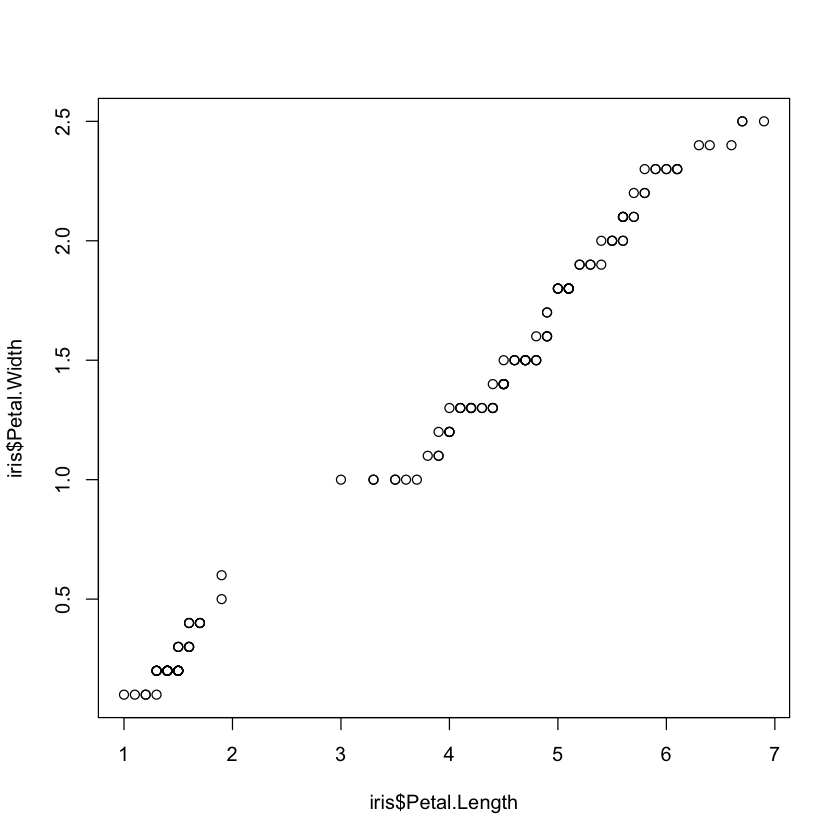

In [6]:
qqplot(iris$Petal.Length, iris$Petal.Width)

In [7]:
library(scatterplot3d)

ERROR: Error in library(scatterplot3d): there is no package called ‘scatterplot3d’
